In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Load Data
df = pd.read_csv('Stocks Data.csv', header = 1)
df = df.iloc[1:, :].rename(columns={'Symbols': 'Date'}).reset_index().drop('index',axis=1)
df.Date = pd.to_datetime(df.Date)

In [3]:
# Separate dataframe by stock
mrin = df[['Date', 'MRIN']].dropna()
mxl = df[['Date', 'MXL']].dropna()
agys = df[['Date', 'AGYS']]
dell = pd.read_csv('DELL.csv')[['Date', 'Close']]
aapl = pd.read_csv('AAPL.csv')[['Date', 'Close']]
dell.Date = pd.to_datetime(dell.Date)
aapl.Date = pd.to_datetime(aapl.Date)


In [4]:
df.AAPL = aapl.Close
dell_df = df.DELL.copy(deep=True)
dell_df.iloc[-len(dell.Close):] = dell.Close
df.DELL = dell_df

## EDA

In [5]:
df.describe()

,AAPL,MRIN,MXL,DELL,AGYS
count,4971.000000,2147.000000,2901.000000,1289.000000,4971.000000
mean,24.932980,25.091230,16.455240,27.258008,14.270527
std,32.337485,28.540419,9.804726,9.918234,9.406661
min,0.234286,0.870000,4.030000,11.997515,2.090000
25%,3.017143,2.725000,8.320000,20.397179,9.170000
50%,14.161071,11.900000,15.500000,25.534719,11.760000
75%,31.661250,44.275002,22.370001,30.816015,16.134999
max,156.690002,119.279999,54.700001,53.411049,62.910000


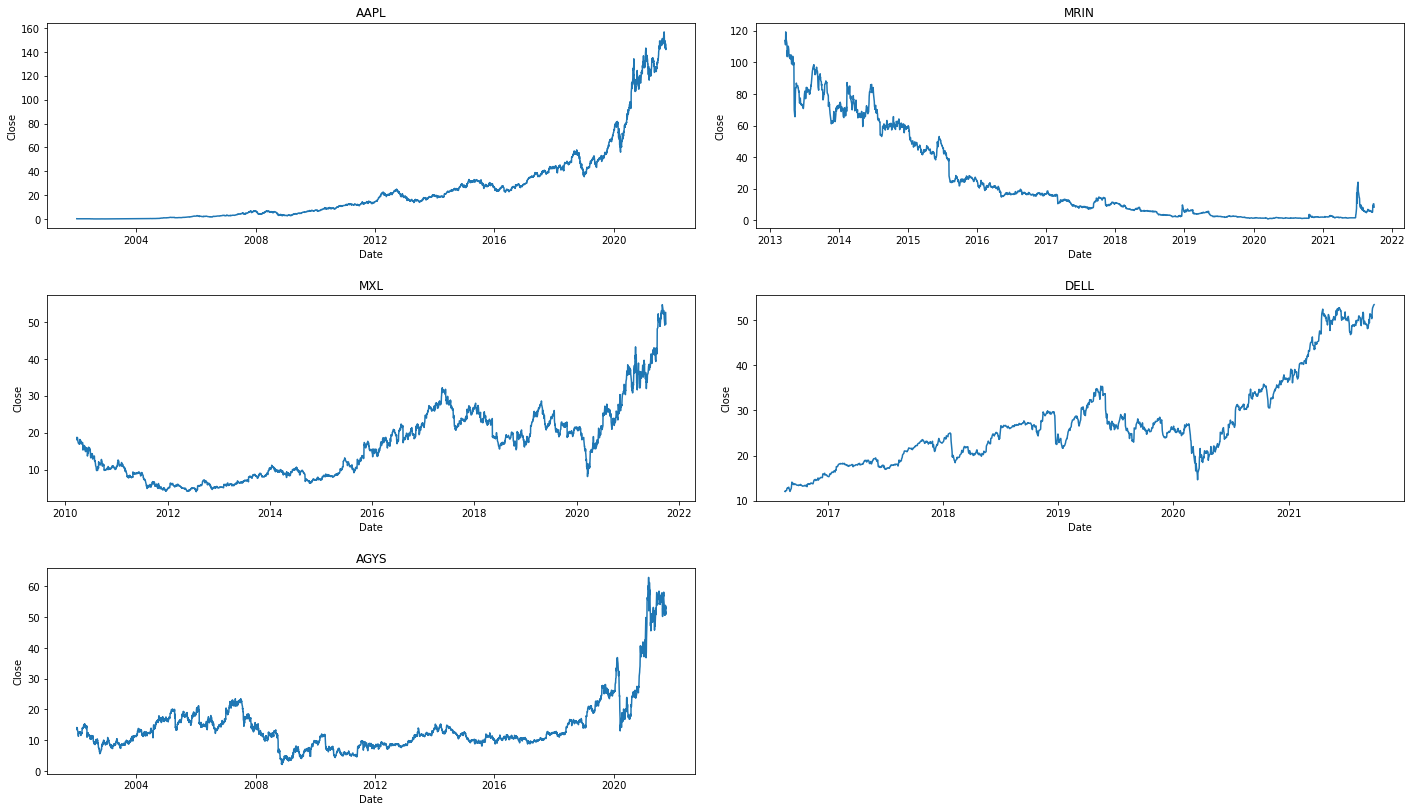

In [6]:
plt.figure(figsize=(20, 15))

# plot 5 stocks

for i, comp_index in enumerate(df.columns[1:]):
    plt.subplot(4, 2, i + 1)
    plt.plot(df["Date"], df.iloc[:, i+1])
    plt.title(df.columns[i+1])
    plt.ylabel('Close')
    plt.xlabel('Date')
    
plt.tight_layout(pad=2.0)

In [7]:
log_returns = np.log(df.iloc[:,1:].astype('float') / df.iloc[:,1:].astype('float').shift(1))

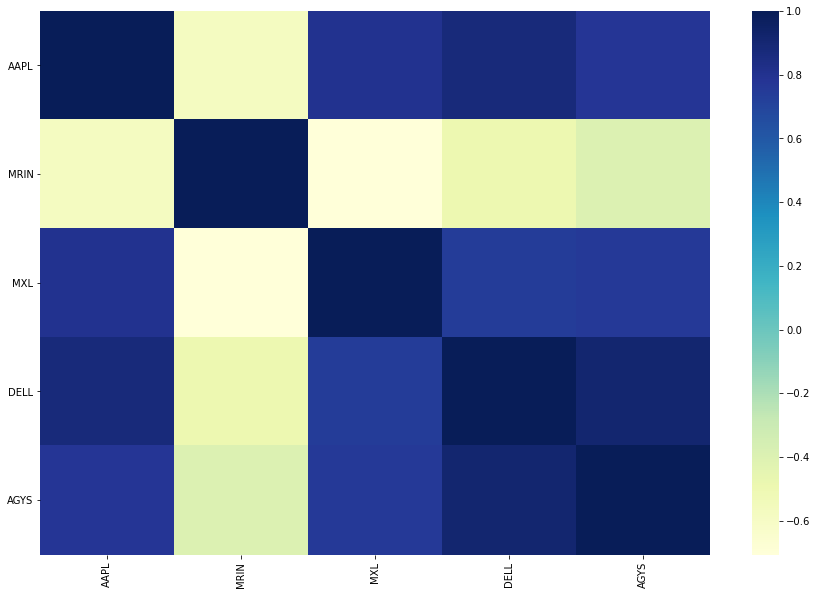

In [8]:
corr_df = df.corr(method='pearson')

#reset symbol as index
corr_df.head().reset_index()
plt.figure(figsize=(15,10))
sns.heatmap(corr_df, cmap="YlGnBu")
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()

In [9]:
sorted_pairs = corr_df.unstack().sort_values()
lowest_corr = sorted_pairs[::2]
lowest_corr.head()

MRIN  MXL    -0.706411
AAPL  MRIN   -0.573700
MRIN  DELL   -0.491214
AGYS  MRIN   -0.395518
DELL  MXL     0.740593
dtype: float64

### Volatility

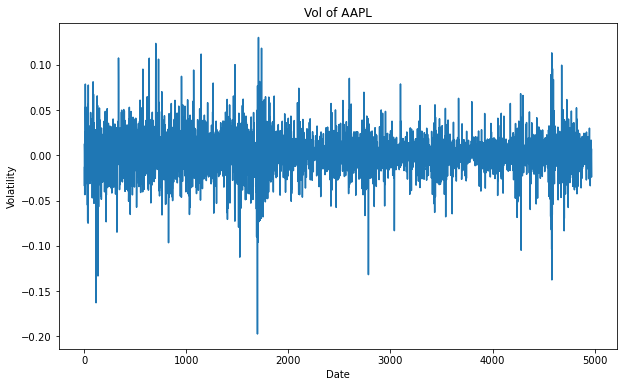

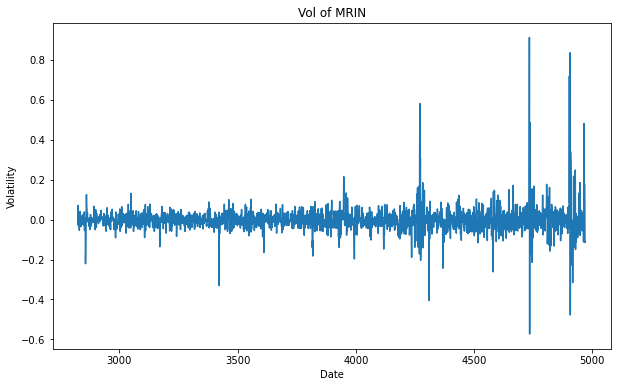

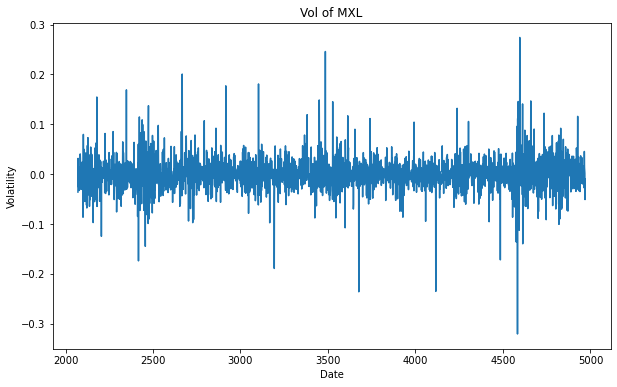

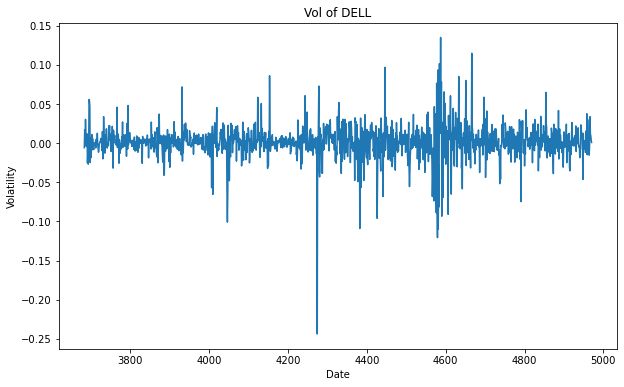

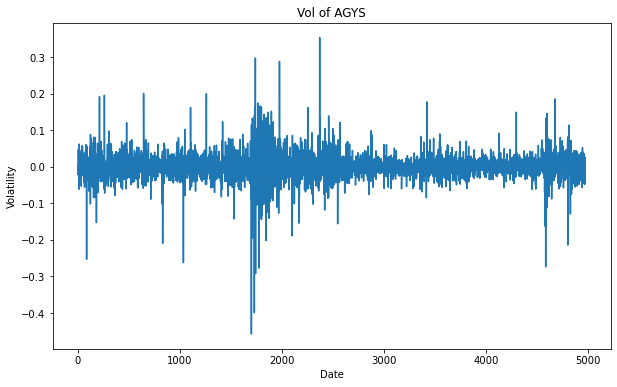

In [10]:
for stock in df.columns[1:]:
    log_rtns = np.log(df[stock]/df[stock].shift())
    fig = plt.figure(figsize=(10,6))
    ax2 = fig.add_subplot(1,1,1)
    log_rtns.plot(ax=ax2)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Volatility')
    ax2.set_title('Vol of {}'.format(stock))
    plt.show()


## Risk vs. Return

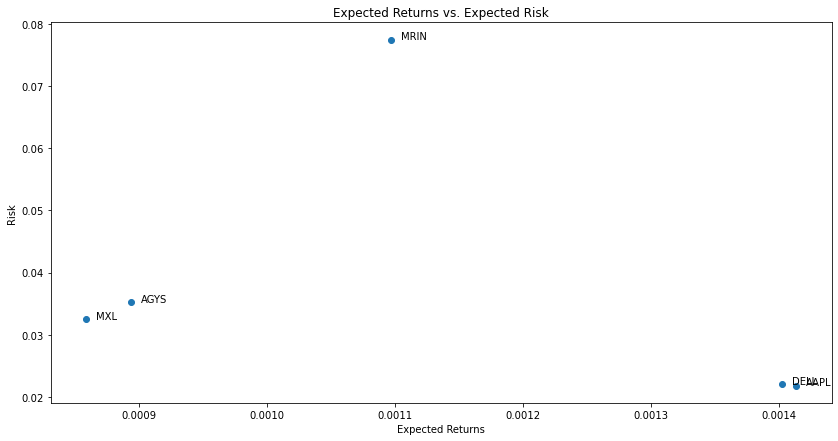

In [11]:
returns = df.iloc[:,1:].pct_change()
plt.figure(figsize=(14,7))
plt.scatter(returns.mean(), returns.std())
plt.xlabel('Expected Returns')
plt.ylabel('Risk')
plt.title('Expected Returns vs. Expected Risk')
for label, x, y in zip(df.columns[1:], returns.mean(), returns.std()):
    plt.annotate(label, xy = (x,y), xytext=(10,0), textcoords = 'offset points')

## Code Citation:
https://github.com/amanjain252002/Stock-Price-Prediction/blob/main/Data_Preprocessing_And_EDA.ipynb